
# Relación entre la vulnerabilidad económica, el nivel de ruido y la disponibilidad del servicio público de bicicletas en zonas de Valencia.
  ## Un análisis estadístico de datos abiertos disponibles.
* Autor: Jorge Israel Frómeta Moya
* Fecha: 17/9/2024

## Tabla de Contenido

- [Introducción](#Introducción)
- [Carga_y_Exploración_de_Datos](#Carga_y_Exploración_de_Datos)
- [Preparación_de_los_Datos](#Preparación_de_los_Datos)
- [Modelado_y_Resultados](#Modelado_y_Resultados)
- [Conclusiones](#Conclusiones)

## Introducción
La Generalitat Valenciana, a través de su Portal de Datos Abiertos, facilita a la ciudadanía el acceso libre y gratuito a los datos públicos en formato abierto que produce como resultado de las actividades que realiza en el ejercicio de sus competencias. A estos datos se pueden acceder mediante el link [https://portaldadesobertes.gva.es/es.](https://portaldadesobertes.gva.es/es)

Entre estos datos que pone a disposición del público se encuentran la clasificación de la vulnerabilidad económica, el nivel de ruido y la disponibilidad del servicio público de bicicletas en zonas de Valencia. A primera vista la posible relación de estos elementos no se hace evidente, pero desde un punto de vista social, encontrar posibles patrones de relación puede favorecer una toma de decisiones que ayude a zonas vunerables económicamente a no ser más perjudicadas por aspectos como una menor disponibilidad de un servcio público como las bicicletas o el exceso de ruido.
Es por ello que este análisis tiene como objetivo investigar la relación entre la vulnerabilidad económica, el nivel de ruido y la disponibilidad del servicio público de bicicletas en zonas de Valencia. Para ello se plantean una serie de interrogantes que guian el análisis:

* Existen diferencias significativas de la disponibilidad del servicio público de bicicletas entre las zonas de Valencia de acuerdo a su grado de vulnerabilidad económica?
  
* Existen diferencias significativas de los niveles de ruido entre las zonas de Valencia de acuerdo a su grado de vulnerabilidad económica? 

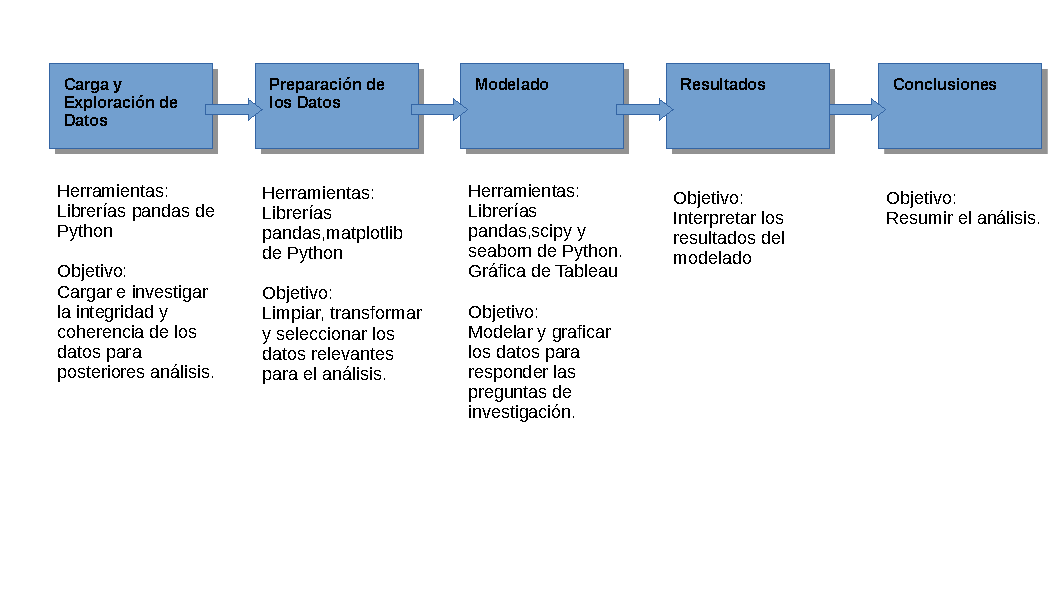

In [3]:
from IPython.display import Image
Image(filename='images/flowchart.png')

## Carga_y_Exploración_de_Datos

* Importar las librerías y archivos necesarios para el análisis.
* Exploración inicial de los conjuntos de datos.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importando el conjunto de datos sobre la vulnerabilidad por barrios en Valencia
df_vulnerability = pd.read_csv("data/vulnerabilidad-por-barrios.csv")
#Exploración inicial
df_vulnerability.info()
df_vulnerability.head()

#Importando el conjunto de datos sobre la disponibilidad de bicicletas públicas en Valencia
df_disponibilidad_bici = pd.read_csv('data/valenbisi-disponibilitat-valenbisi-dsiponibilidad.csv')
#Exploración inicial
df_disponibilidad_bici.info()
df_disponibilidad_bici.head()

#Importando el conjunto de datos sobre el nivel de ruido en Valencia
df_ruido = pd.read_csv('data/mapa-soroll-24h-mapa-ruido-24h.csv')
#Exploración inicial
df_ruido.info()
df_ruido.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitud     70 non-null     float64
 1   longitud    70 non-null     float64
 2   Geo Shape   70 non-null     object 
 3   Nombre      70 non-null     object 
 4   Codbar      70 non-null     int64  
 5   Distrito    70 non-null     object 
 6   Ind_Equip   70 non-null     float64
 7   Vul_Equip   70 non-null     object 
 8   Ind_Dem     70 non-null     float64
 9   Vul_Dem     70 non-null     object 
 10  Ind_Econom  70 non-null     float64
 11  Vul_Econom  70 non-null     object 
 12  Ind_Global  70 non-null     float64
 13  Vul_Global  70 non-null     object 
 14  Shape_Leng  70 non-null     float64
 15  Shape_Area  70 non-null     float64
dtypes: float64(8), int64(1), object(7)
memory usage: 8.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 11 co

,Nivell / Nivel,gid,latitud,longitud
0,2,15,39.498763,-0.387661
1,2,16,39.524311,-0.372451
2,3,18,39.430307,-0.368659
3,3,20,39.451943,-0.352795
4,3,23,39.475539,-0.366606


## Preparación_de_los_Datos

* Limpieza de los datos, deshacerse de atributos que no contribuyen al análisis.
    
* Transformación de datos: Convertir el formato de geolocalización de string a array numérico (para ello se utiliza la función convert_geoString_to_geoArray().
    
* Selección de características: Seleccionar y unir los atributos relevantes para el análisis.


In [23]:
#Eliminando atributos no necesarios para el analisis
df_disponibilidad_bici.drop(['Numero', 'Activo','ticket','geo_shape','fecha_actualizacion'],axis=1,inplace=True)

def convert_geoString_to_geoArray(geoString):
    """Función para convertir las coordenadas de la formas 
    del área en cuestión, desde un formato de texto a un array de numpy"""
    
    #Removiendo las etiquetas del principio y el final
    geoString0 = geoString.removeprefix('{"coordinates":').removesuffix(', "type": "Polygon"}').strip()
    
    #Reemplazando las llaves en formato texto para que puedan ser convertidos los textos a números por numpy
    geoString1 = geoString0.replace('[','').replace(']','')
    
    #Llevando los textos a números con numpy
    geoArray0 = np.fromstring(geoString1, sep=',')
    
    #Se crea una lista vacía para guardar las diferentes coordenadas
    geoList = []  
    # Recorre todos los puntos de la geolocalización convertidos para agruparlo en parejas como en el formato original
    for i,j in  enumerate(geoArray0):
        if (i+1) % 2 != 0:
            array = [j]
        else:
            array.append(j)
            geoList.append(array)

    geoArray = np.array(geoList)
    return geoArray

#Transformando el atributo de geolocalización
df_vulnerability['Geo Shape'] = df_vulnerability['Geo Shape'].apply(convert_geoString_to_geoArray)


Para poder ubicar los distintos puntos de disponibilidd de bicicletas y nivel de ruido dentro de los perímetros de los barrios de Valencia según sus coordenadas de longitud y latitud se hace necesario un algoritmo. En este caso se implementa el algoritmo Ray Casting mediante la función punto_in_poligono(). Luego se realiza una prueba que incluye su representación gráfica.

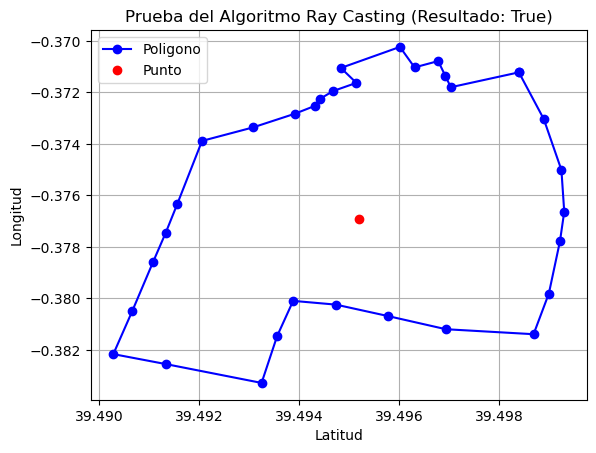

In [26]:
#Algoritmo Ray Casting
def punto_in_poligono(punto,poligono):
    """Determina si un punto dada sus coordenadas en 2D está dentro de un polígono,
    definido por una lista de coordenadas en 2D. La function devuelve True o False"""
    lat = punto[0]
    long = punto[1]    
    #Eliminando el ultimo vertice del poligono pues es igual al primero
    poligono = poligono[:-1,:]
    n = len(poligono)
    inside = False
    j = n-1
    
    for i in range(n):
        lat_i,long_i = poligono[i]
        lat_j,long_j = poligono[j]
        if long > min(long_i,long_j):
            if long <= max(long_i,long_j):
                if lat <= max(lat_i,lat_j):
                    if long_i != long_j:
                        xinters = (long - long_i)*(lat_j -lat_i)/(long_j - long_i) + lat_i
                    if lat_i == lat_j or lat <= xinters:
                        inside = not inside
        j = i
    return inside

y,x = df_vulnerability['latitud'][0],df_vulnerability['longitud'][0]
punto_prueba = [x,y]
poligono_prueba = df_vulnerability['Geo Shape'][0]

result = punto_in_poligono(punto=punto_prueba,poligono=poligono_prueba)

#Definimos las coordenadas de los vertices del poligono
long_pol,lat_pol = zip(*df_vulnerability['Geo Shape'][0])

plt.figure()
plt.plot(lat_pol,long_pol,'bo-',label='Poligono')
plt.plot(y,x,'ro',label="Punto")
plt.legend()
plt.grid(True)
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.title("Prueba del Algoritmo Ray Casting (Resultado: True)")
plt.show()



Luego, utilizando la geolocalización de cada punto de disponibilidad de bicicleta y de nivel de ruido se le ubica en su barrio correspondiente mediante el algoritmo de *Ray Casting* modelado y se le asigna el grado de vulnerabilidad económica en correspondencia. En caso de no poder ser ubicado se le elimina del análisis.

In [29]:
#Creando listas vacias para almacenar la informacion transitoriamente
name_zones = []
ind_econom_list = []
vul_econom_list = []
#Se recorren todos los campos del conjunto de datos de la disponibilidad de bicicletas 
#y se extrae la latitud y la longitud
for i in range(len(df_disponibilidad_bici.index)):
    lat = df_disponibilidad_bici['latitud'][i]
    long = df_disponibilidad_bici['longitud'][i]
    punto = [long,lat]
    list_size0 = len(name_zones)
    #Por cada barrio y de acuerdo la geolocalizacion de su perimetro se comprueba si pertenece o no l mismo,
    #en caso positivo se almacena el nombre del barrio, su indice de vulnerabilidad economica y su clasificacion
    for j in range(len(df_vulnerability.index)):
        poligono = df_vulnerability['Geo Shape'][j]    
        result = punto_in_poligono(punto,poligono)
        if result:
            name_zones.append(df_vulnerability['Nombre'][j])
            ind_econom_list.append(df_vulnerability['Ind_Econom'][j])
            vul_econom_list.append(df_vulnerability['Vul_Econom'][j])
    #Se comprueba si la lista de zonas ha crecido, de no ser asi sigifica que no se le pudo asignar a algun punto 
    #su barrio correspondiente, por lo que se le etiqueta "Not found".
    list_size1 = len(name_zones)
    if list_size0 == list_size1:
        name_zones.append("Not found")
        ind_econom_list.append("Not found")
        vul_econom_list.append("Not found")
#Se añade los datos de barrio, indice y clasificacion de vulnerabilidad economica correspondiente a cada punto
#del conjunto de datos de disponibilidad de bicicletas
df_disponibilidad_bici['Name_Zone'] = name_zones
df_disponibilidad_bici['Ind_Econom'] = ind_econom_list
df_disponibilidad_bici['Vul_Econom'] = vul_econom_list
#Por ultimo se eliminan los elementos que no se le pudieron asignar barrios
df_disponibilidad_bici.drop(df_disponibilidad_bici[df_disponibilidad_bici['Name_Zone']=='Not found'].index,inplace=True)

#Se repite el mismo procedimiento para el conjunto de datos del nivel de ruido
name_zones = []
ind_econom_list = []
vul_econom_list = []
for i in range(len(df_ruido.index)):
    lat = df_ruido['latitud'][i]
    long = df_ruido['longitud'][i]
    punto = [long,lat]
    list_size0 = len(name_zones)
    for j in range(len(df_vulnerability.index)):
        poligono = df_vulnerability['Geo Shape'][j]    
        result = punto_in_poligono(punto,poligono)
        if result:
            name_zones.append(df_vulnerability['Nombre'][j])
            ind_econom_list.append(df_vulnerability['Ind_Econom'][j])
            vul_econom_list.append(df_vulnerability['Vul_Econom'][j])
            
    list_size1 = len(name_zones)
    if list_size0 == list_size1:
        name_zones.append("Not found")
        ind_econom_list.append("Not found")
        vul_econom_list.append("Not found")

df_ruido['Name_Zone'] = name_zones
df_ruido['Ind_Econom'] = ind_econom_list
df_ruido['Vul_Econom'] = vul_econom_list
df_ruido.drop(df_ruido[df_ruido['Name_Zone']=='Not found'].index,inplace=True)


## Modelado_y_Resultados
Para modelar los datos de manera que responda al objetivo del análisis y dé respuestas a las preguntas de investigación se recurre primeramente a la visualización de los datos. A continuacion se muestra un mapeo de la geolocalización de los datos de interés realizado en la plataforma web Tableau. Dicho dashboard puede observarse en el link [https://public.tableau.com/app/profile/jorge.fr.meta.moya/viz/RelacinentrelavulnerabilidadeconmicaelnivelderuidoyladisponibilidaddelserviciopblicodebicicletasenzonasdeValencia_/Dashboard1](https://public.tableau.com/app/profile/jorge.fr.meta.moya/viz/RelacinentrelavulnerabilidadeconmicaelnivelderuidoyladisponibilidaddelserviciopblicodebicicletasenzonasdeValencia_/Dashboard1).

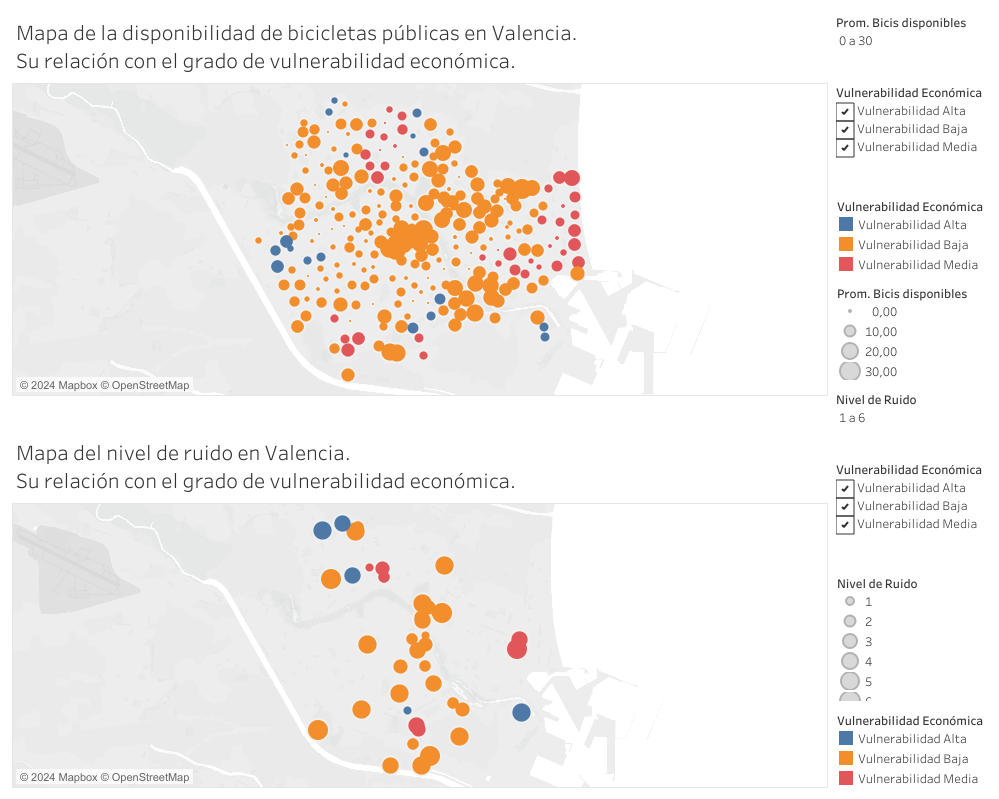

In [31]:
Image(filename='Dashboard 1.png')

También se grafican las medias de las varibles de interés en diagramas de barras separados por los distintos grupos de vulnerabilidad económica.

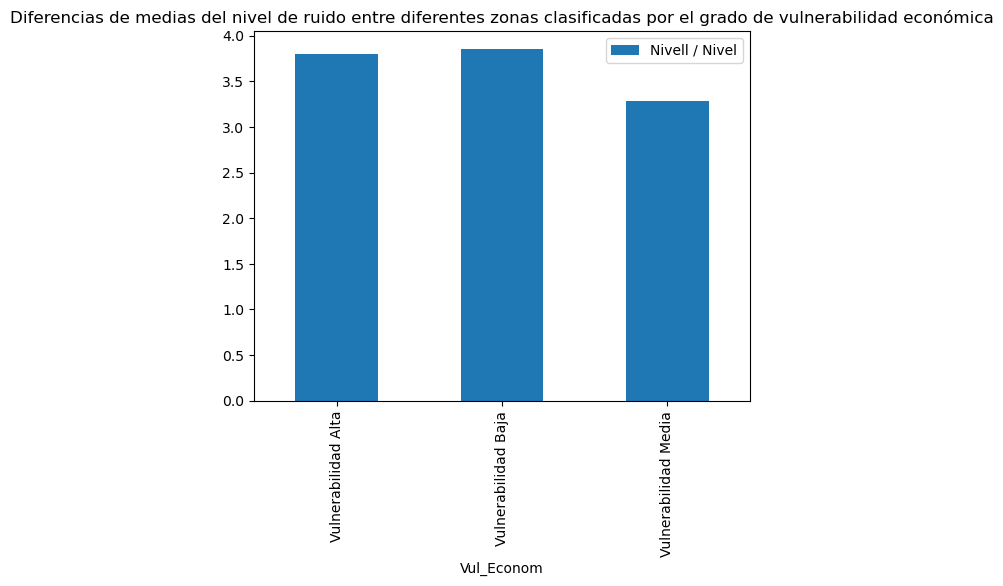

In [35]:
ax = df_ruido[['Vul_Econom','Nivell / Nivel']].groupby('Vul_Econom').mean().plot(kind='bar')
ax.set_title('Diferencias de medias del nivel de ruido entre diferentes zonas clasificadas por el grado de vulnerabilidad económica')
plt.show()             

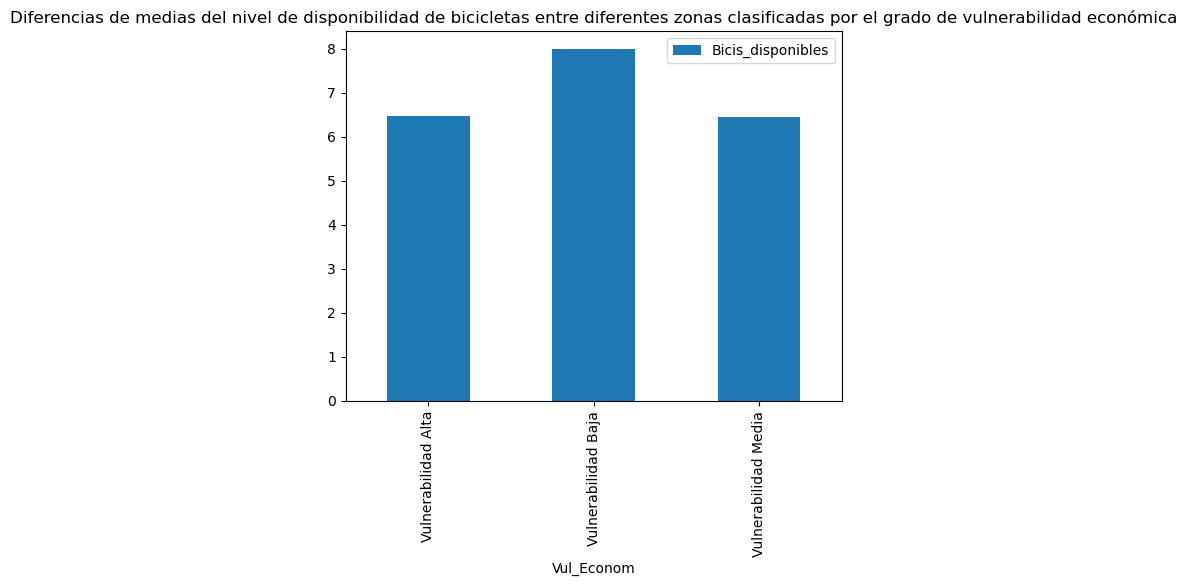

In [37]:
ax = df_disponibilidad_bici[['Vul_Econom','Bicis_disponibles']].groupby('Vul_Econom').mean().plot(kind='bar')
ax.set_title('Diferencias de medias del nivel de disponibilidad de bicicletas entre diferentes zonas clasificadas por el grado de vulnerabilidad económica')
plt.show()   

Por último, se recurre al análisis de varianza, o ANOVA (por sus siglas en inglés), la cual es una técnica estadística fundamental que nos permite comparar las medias de tres o más grupos. Su principal objetivo es determinar si existen diferencias significativas entre estos grupos.
En este caso se compara si existe diferencias significtivas en la disponibilidad del servicio público de bicicletas y nivel de ruido entre las zonas de Valencia de acuerdo a su grado de vulnerabilidad económica. Se realizan 3 clasificaciones de vulnerabilidad económica (Alta, Media y Baja), lo que origina 3 grupos de zonas sobre los cuales se realizan las pruebas. se utiliza la librería scipy.

In [40]:
from scipy import stats

ruido_grupo_vulnerabilidad = [df_ruido[df_ruido['Vul_Econom'] == group]['Nivell / Nivel'] for group in df_ruido['Vul_Econom'].unique()]
F_ruido,p_value_ruido = stats.f_oneway(ruido_grupo_vulnerabilidad[0],ruido_grupo_vulnerabilidad[1],ruido_grupo_vulnerabilidad[2])

bicisDisponibles_grupo_vulnerabilidad = [df_disponibilidad_bici[df_disponibilidad_bici['Vul_Econom'] == group]['Bicis_disponibles'] for group in df_disponibilidad_bici['Vul_Econom'].unique()]
F_bici_disp,p_value_bici_disp = stats.f_oneway(bicisDisponibles_grupo_vulnerabilidad[0],bicisDisponibles_grupo_vulnerabilidad[1],bicisDisponibles_grupo_vulnerabilidad[2])

print("El p_valor del análisis de varianza para el nivel de ruido es: ",p_value_ruido)
print("El p_valor del análisis de varianza para la disponibilidad de bicicletas es: ",p_value_bici_disp)

El p_valor del análisis de varianza para el nivel de ruido es:  0.6805171880504062
El p_valor del análisis de varianza para la disponibilidad de bicicletas es:  0.22769785906048498


## Conclusiones

LLegado a este punto se puede concluir que:

1. El análisis visual no revela un patrón significativo de diferenciación en cuanto al nivel de ruido medio y la disponibilidad media de bicicletas del servicio público entre las zonas de Valencia, agrupadas por su grado de vulnerabilidad económica.
2. El análisis estadístico mediante la técnica ANOVA respalda esta apreciación visual, no siendo significativas la diferencias de medias entre estos indicadores ni siquiera para un 80% de nivel de confianza.

Limitaciones:
* El estudio presentado no tiene en cuenta la potencia estadística de las pruebas de hipótesis realizadas, tampoco se corroboran los supuestos de la utilización de la prueba ANOVA como la normalidad de las variables o la homocedasticidad.
* El análisis se realiza sobre variables muestrales fuertemente desbalanceadas, debido a la predominancia de la clasificación de baja vulnerabilidad en las distintas zonas de Valencia tal como se muestra en el siguiente gráfico.
* Por todo ello los resultados deben ser tomados con cautela en cuantu a su fiabilidad estadística.


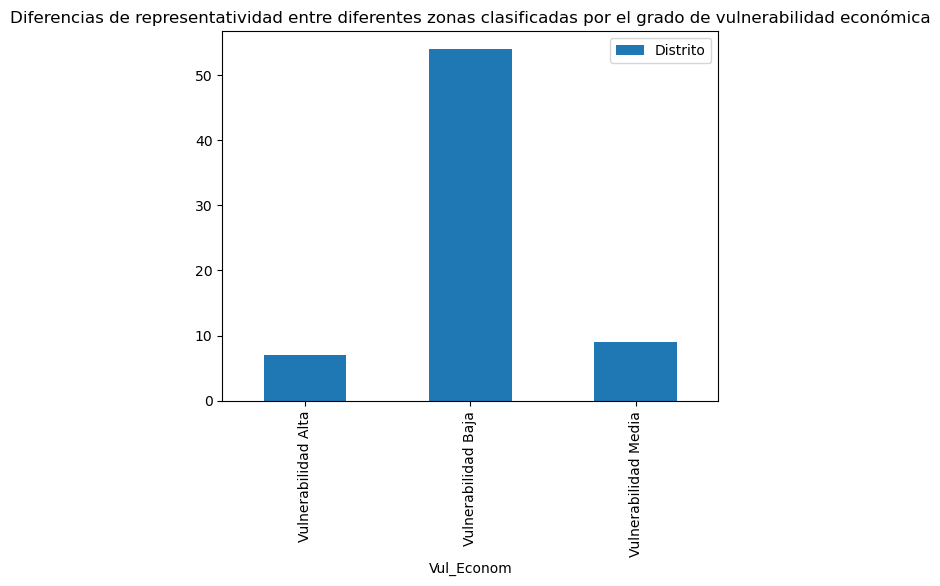

In [68]:
ax = df_vulnerability[['Vul_Econom','Distrito']].groupby('Vul_Econom').count().plot(kind='bar')
ax.set_title('Diferencias de representatividad entre diferentes zonas clasificadas por el grado de vulnerabilidad económica')
plt.show() 

Recomendaciones:

* Teniendo en cuenta los resultados que demuestran que no hay diferencias significativas en cuanto al nivel de ruido y la disponibilidad de bicicletas públicas entre zonas según el grado de vulnerabilidad económica. Los decisores pueden tener en cuentta esta información para intencionar políticas públicas que favorezcan una mayor disponibilidad de servicios públicos y menor afectación de ruido a zonas de por sí afectadas eonómicamente.